# Statistical Properties of simulated financial data

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs # provide a large number of probability distribution functions
import statsmodels as smd # statistical computation models including descriptive statistics and estimation and inference

In [2]:
import statsmodels.api as sm # application programming interface
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Garbiel\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### numpy and pandas have faster release cycles and statsmodels often lags in catching up with deprecations and deprecation warnings. However, they are usually fixed after a short delay. Deprecation warnings in statsmodels can be ignored by users. (reporting deprecation warnings in statsmodels master is still useful in case we are slow in seeing them)

In [3]:
M = 10
I = 5
paths1 = np.zeros((M + 1, I), np.float64)   # Each column is a path
paths1

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [4]:
H = 10

rand = np.random.standard_normal(H) #sample from standard normal distribution
print(rand)
rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
print(rand.mean())
print(rand.std())

[-0.8044583   0.32093155 -0.02548288  0.64432383 -0.30079667  0.38947455
 -0.1074373  -0.47998308  0.5950355  -0.46466753]
2.22044604925e-17
1.0


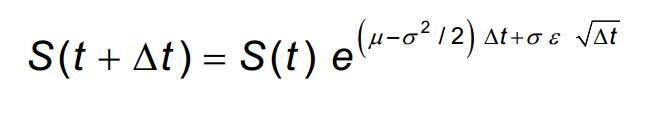

In [5]:
# Geometric Brownian Motion of stock price movement
from IPython.display import Image
Image(filename='BSM.png')

In [6]:
def gen_paths(S0=100, r=0.05, sigma=0.25, T=1, N=500, J=10000):
    ''' Generates Monte Carlo simulation paths ( geometric brownian motion) for stock movement
    Parameters
    ==========
    S0 : float (initial stock price)
    r : float (constant interest rate)
    sigma : float (constant volatility)
    T : float (time to the simulated path)
    N : int (N+1 nodes on each path)
    J : int (number of simulated paths)
    Returns
    =======
    paths : ndarray, shape (N + 1, I)    (dimensions of simulated paths)
    '''
    dt = float(T) / N
    paths = np.zeros((N + 1, J), np.float64)   # Each column is a simulated path
    paths[0,:] = 100                            # Assign the first element of each column is 100
    for t in range(1, N + 1):                  # N nodes in range, making N+1 nodes in all with the initial value
        rand = np.random.standard_normal(J)    # Get a std normal draw for each path
        rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [7]:
n=500
paths = gen_paths(N=n)
print(paths.shape)

(501, 10000)


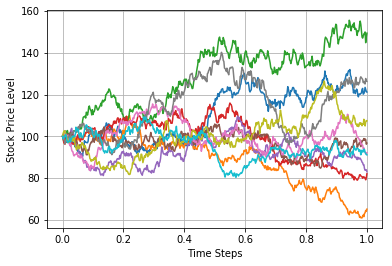

In [8]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:,0:10])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

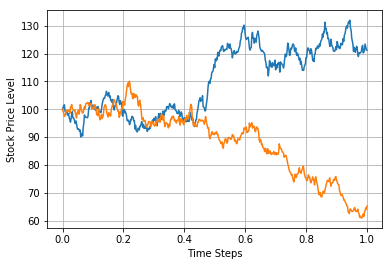

In [9]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:,:2])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

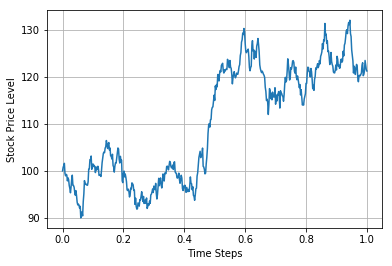

In [10]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:,0:1])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

In [11]:
type(paths[:,0])

numpy.ndarray

In [12]:
paths[:, 0].round(4)# 0 indicate the first path movement

array([ 100.    ,  100.7587,  101.1412,  101.6113,   99.4557,   98.9594,
         99.2747,   99.1264,   97.8895,   98.5343,   98.1591,   96.891 ,
         96.2909,   95.3635,   96.6047,   98.1363,   99.1019,   96.9513,
         96.9076,   96.5392,   95.5482,   94.8477,   95.8   ,   94.735 ,
         93.3633,   92.7931,   92.9547,   92.7511,   92.1148,   92.4919,
         90.0284,   91.1356,   91.3193,   90.4627,   93.4735,   95.1195,
         97.939 ,   97.2519,   97.3299,   97.0578,   97.0018,   96.9582,
         97.6845,  100.3824,  100.4392,  102.3833,  102.4303,  103.1617,
        100.3512,  100.9715,  101.4823,  100.925 ,  101.1917,  100.8336,
         99.6505,  100.8523,  100.2249,  100.4551,  100.992 ,  100.4269,
         99.0411,   99.1008,   99.211 ,   98.8157,  100.0894,  101.7384,
        102.8206,  103.7039,  104.0043,  103.8727,  104.8494,  105.1187,
        106.451 ,  105.7556,  104.7653,  105.5988,  106.0223,  104.4358,
        104.8767,  103.2103,  103.155 ,  102.523 , 

In [13]:
paths[:, 0].size

501

In [14]:
# calculate the return
log_returns=np.log(paths[1:]/paths[:-1])
type(log_returns)

numpy.ndarray

In [15]:
log_returns.size

5000000

In [16]:
log_returns[:,].size

5000000

In [17]:
log_returns[:,0]

array([  7.55794138e-03,   3.78949599e-03,   4.63711486e-03,
        -2.14429118e-02,  -5.00218327e-03,   3.18108819e-03,
        -1.49526027e-03,  -1.25557704e-02,   6.56460998e-03,
        -3.81458256e-03,  -1.30030383e-02,  -6.21281543e-03,
        -9.67835439e-03,   1.29319042e-02,   1.57300290e-02,
         9.79069466e-03,  -2.19392957e-02,  -4.51150745e-04,
        -3.80862999e-03,  -1.03180941e-02,  -7.35814862e-03,
         9.98993305e-03,  -1.11789315e-02,  -1.45858231e-02,
        -6.12589314e-03,   1.73963558e-03,  -2.19210779e-03,
        -6.88364638e-03,   4.08552997e-03,  -2.69966277e-02,
         1.22237513e-02,   2.01327398e-03,  -9.42379088e-03,
         3.27402003e-02,   1.74557156e-02,   2.92110489e-02,
        -7.04105656e-03,   8.01731330e-04,  -2.79945872e-03,
        -5.76426386e-04,  -4.49616627e-04,   7.46228644e-03,
         2.72441781e-02,   5.66297034e-04,   1.91701694e-02,
         4.59439384e-04,   7.11480188e-03,  -2.76213035e-02,
         6.16233361e-03,

In [18]:
len(log_returns[:,0])

500

In [19]:
paths[:, 1].size

501

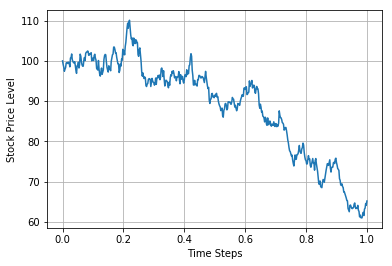

In [20]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:,1:2])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

In [21]:
paths[:, 1].round(4)# 0 indicate the first path movement

array([ 100.    ,   99.1272,   98.4417,   97.4168,   97.9279,   98.3128,
         99.4873,   99.387 ,   99.6295,   99.3304,   99.6779,   99.4634,
         98.5226,  100.7241,  100.8155,  101.7173,  100.3092,   99.8618,
         99.569 ,   99.4703,   99.7941,   98.7989,   97.6072,   96.8956,
         98.8408,   98.7296,   99.6747,   98.2292,   99.1001,  101.6733,
        101.1717,   99.7678,   98.9906,   98.6718,   98.6847,  100.1741,
        100.8323,  100.0846,  101.8377,  102.151 ,  102.1972,  102.4442,
        102.3735,  101.3701,  101.488 ,  101.8159,  101.6814,  102.0317,
        100.0046,  100.5254,  100.7035,  100.0928,  101.3336,  101.6499,
        100.682 ,  100.1774,   98.1361,   97.8917,   97.7279,  100.0931,
         97.8832,   96.7015,   96.2175,   97.1244,   98.2107,   96.6637,
         97.1722,   97.7779,  100.3381,  101.298 ,  101.6057,  101.5045,
         99.7414,   98.376 ,   97.7311,   97.2173,   98.777 ,   98.0401,
         98.0685,   97.5495,   99.8885,  100.6852, 

In [22]:
log_returns[:,1]

array([ -8.76669681e-03,  -6.93851681e-03,  -1.04666297e-02,
         5.23327215e-03,   3.92263455e-03,   1.18752607e-02,
        -1.00861693e-03,   2.43733897e-03,  -3.00634311e-03,
         3.49236278e-03,  -2.15461012e-03,  -9.50351484e-03,
         2.20988533e-02,   9.06656914e-04,   8.90585749e-03,
        -1.39405543e-02,  -4.47011899e-03,  -2.93549058e-03,
        -9.92116770e-04,   3.25000468e-03,  -1.00229565e-02,
        -1.21345660e-02,  -7.31806967e-03,   1.98763487e-02,
        -1.12501136e-03,   9.52712777e-03,  -1.46086397e-02,
         8.82736088e-03,   2.56338146e-02,  -4.94574609e-03,
        -1.39733706e-02,  -7.82057804e-03,  -3.22547372e-03,
         1.30513074e-04,   1.49798946e-02,   6.54855184e-03,
        -7.44254357e-03,   1.73648336e-02,   3.07161095e-03,
         4.52206566e-04,   2.41387055e-03,  -6.90206532e-04,
        -9.85037713e-03,   1.16239017e-03,   3.22573966e-03,
        -1.32149425e-03,   3.43888549e-03,  -2.00666650e-02,
         5.19421667e-03,

In [23]:
paths[:].size

5010000

In [24]:
r = np.log(paths[:])
r.size

5010000

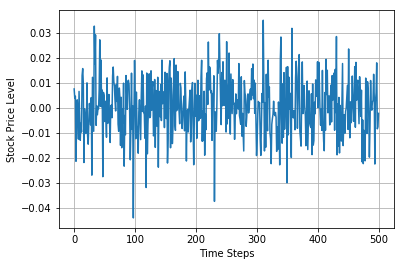

In [25]:
plt.plot(log_returns[:,0])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

In [26]:
log_returns[:20,0].round(5)

array([ 0.00756,  0.00379,  0.00464, -0.02144, -0.005  ,  0.00318,
       -0.0015 , -0.01256,  0.00656, -0.00381, -0.013  , -0.00621,
       -0.00968,  0.01293,  0.01573,  0.00979, -0.02194, -0.00045,
       -0.00381, -0.01032])

In [27]:
log_returns[:20,0].size

20

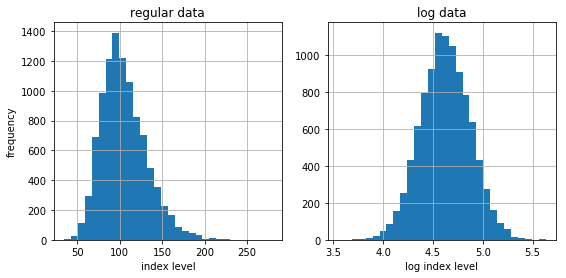

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))       # subplots 1 row and 2 columns, figsize in cm
ax1.hist(paths[-1], bins=30) # price at time =1
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')


In [29]:
def print_statistics(array):  
    ''' statistics results.
    
    
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('Statistic', 'Result'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

In [30]:
print_statistics(paths[0])

     Statistic          Result
------------------------------
          size     10000.00000
           min       100.00000
           max       100.00000
          mean       100.00000
           std         0.00000
          skew         0.00000
      kurtosis        -3.00000


In [31]:
print_statistics(paths[1])

     Statistic          Result
------------------------------
          size     10000.00000
           min        95.87691
           max       103.88829
          mean       100.01000
           std         1.11803
          skew        -0.00037
      kurtosis        -0.09062


In [32]:
print_statistics(paths[10])

     Statistic          Result
------------------------------
          size     10000.00000
           min        88.47779
           max       114.71773
          mean       100.10111
           std         3.57028
          skew         0.10436
      kurtosis        -0.00889


In [33]:
print_statistics(paths[250])

     Statistic          Result
------------------------------
          size     10000.00000
           min        48.65524
           max       212.04412
          mean       102.51113
           std        18.13003
          skew         0.52298
      kurtosis         0.52514


In [34]:
print_statistics(paths[-1])

     Statistic          Result
------------------------------
          size     10000.00000
           min        34.69898
           max       278.58806
          mean       105.08334
           std        26.51914
          skew         0.78176
      kurtosis         1.12177


In [35]:
print_statistics(log_returns.flatten()) #scs

     Statistic          Result
------------------------------
          size   5000000.00000
           min        -0.05872
           max         0.06043
          mean         0.00004
           std         0.01118
          skew         0.00024
      kurtosis         0.00204


In [36]:
def normality_tests(narray):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(narray))
    print ("Skew test p-value %14.3f" % scs.skewtest(narray)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(narray))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(narray)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(narray)[1])
    

In [37]:
normality_tests(log_returns.flatten())

Skew of data set          0.000
Skew test p-value          0.829
Kurt of data set          0.002
Kurt test p-value          0.351
Norm test p-value          0.633


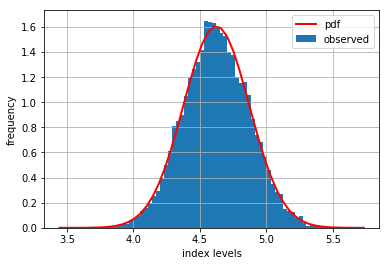

In [38]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='pdf')
plt.legend()

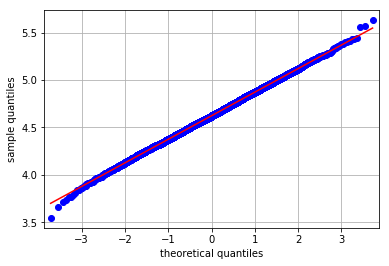

In [39]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

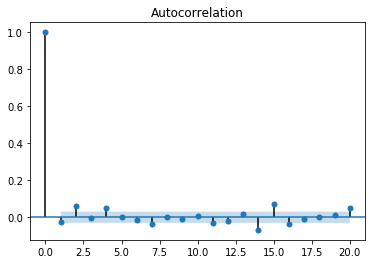

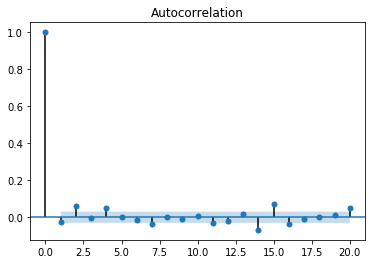

In [40]:
#Autocorrelation test of stock movement returns
smd.graphics.tsaplots.plot_acf(log_returns[:,0], lags=20, alpha=0.5)

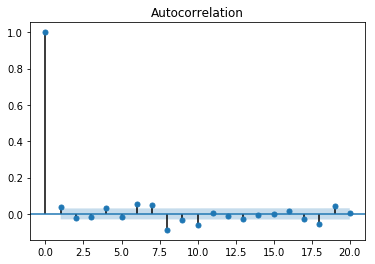

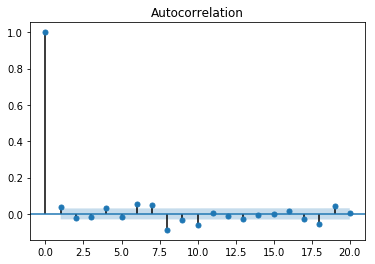

In [41]:
smd.graphics.tsaplots.plot_acf(log_returns[:,1], lags=20, alpha=0.5)